## You have statistics of names for children born in the US between 2004 and 2014

Statistics (Count) are provided for each name, state, gender and year of birth if Count >= 5.

File is available here:
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv', sep=',')

# Summary

This was a fun, interesting project exploring a dataset with statistics about the names of babies born in the United States between 2004 to 2014. As stated above, the dataset included statistics about the gender, birth state, and year of birth associated with each name where at least 5 babies were born with that name for each subgroup (i.e. for each name present in a given state in a given year).

Below please find:
1) Answers to the questions included in the notebook. <br>
2) The analysis used to generate the answers to the questions.

 **Note**: <br>
      Although the attempt was made to show all the answers without the code initially for ease of viewing, a limitation here is that some of the answers include the code here rather than keeping all code located in the analysis portion of the notebook. <br>
      

The analysis reveals some interesting trends in terms of name popularity. Some names, such as Ethan and Sophia, show very consistent popularity over many years! 

<br> The critical reasoning question addresses an interesting nuance about the nature of the dataset and the potential for drawing inaccurate conclusions due to factors such as variations in sample size between states, and underreporting of total numbers due to the condition that names must be present at a magnitude of 5 or higher for a subgroup in order to be included in the dataset.

# Answers to the Questions

## How many different names in the database? 

**Answer:** There are 17,632 unique names in the database

## How many boys and how many girls were born overall? 

**Answer**: <br> There were approximately 19 million boys (19,041,199 boys) and 16.4 million girls (16,380,293 girls) born overall between 2004 and 2014. 

**Additional Comments**:

The total number of births is approximately consistent with listings from the CDC of about 3.6M babies born per year (https://www.cdc.gov/nchs/fastats/births.htm) 

Interesting to see that there is some external evidence that the overall birth rate skews towards more males than females for biological reasons (in addition to social/cultural): https://ourworldindata.org/sex-ratio-at-birth. 
Note: as pointed out in a subsequent question, there can be dataset artifacts, sampling biases etc that can also contribute to the boy: girl ratio of newborns observed in the dataset here.


1.05 is the average ratio of male:female births stated in the article above as compared to approximately 1.15 boys:girls in the dataset here. 

## What are the 10 most popular names in California in 2010?

**Answer**:<br> The 10 most popular names in California in 2010 are: <br> Isabella,
<br>Sophia,
<br>Jacob, 
<br>Daniel,
<br>Anthony,
<br>Alexander,
<br>Angel,
<br>Ethan,
<br>Jayden,
<br>and David.
       

## What are the 10 most popular names for children born after 2010 in US?

**Answer**:<br> The 10 most popular names for children born after 2010 in the US are:
<br>Sophia,
<br>Emma,
<br>Jacob,
<br>Isabella,
<br>Mason,
<br>Olivia,
<br>Noah,
<br>William,
<br>Liam,
<br>and Ethan


## For each of the 10 most popular names, show (in a visualization / chart) how many children were born in each year



**Answer**:<br>
The graphs below show the number of children born each year for each of the 10 most popular names. The time series are shown combined in a single graph and separated into individual graphs in order to allow two different visualizations for commparing the changes in frequency of the names over time. 

(40,)


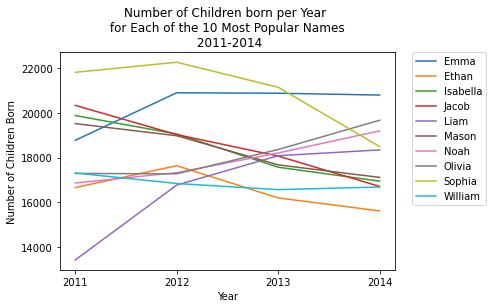

In [78]:
after_2010= baby_names[baby_names.Year>2010]
after_2010.sort_values(by=['Count'], ascending=False)                      
                       
after_2010_sorted=after_2010.sort_values(by=['Count'], ascending=False)
after_2010_sorted.head(n=10)
                       
Names_combined=after_2010_sorted.groupby(['Name'])['Count'].sum()
Names_combined_sorted=Names_combined.sort_values(ascending=False)

Names_combined_sorted.head(n=10)
Names_combo_re_index=Names_combined_sorted.reset_index()
Names_combo_re_index

name_vec_after_2010=Names_combo_re_index['Name'][0:10]
name_vec_after_2010

top10_2010_data=after_2010[after_2010.Name.isin(name_vec_after_2010)]
top10_2010_data
top10_2010_data_grouped=top10_2010_data.groupby(['Name','Year'])['Count'].sum()

top10_2010_data_grouped
top10_2010_data_grouped=top10_2010_data.groupby(['Name','Year'])['Count'].sum()
print(top10_2010_data_grouped.shape)
top10_2010_data_grouped
top10_2010_data_grouped_unstack=top10_2010_data_grouped.unstack()
top10_2010_data_grouped_unstack
top10_2010_data_grouped_flip=top10_2010_data.groupby(['Year','Name'])['Count'].sum()
top10_2010_data_grouped_unstack2=top10_2010_data_grouped_flip.unstack()
top10_2010_data_grouped_unstack2
top10_2010_data_grouped_unstack2.plot()
plt.xticks(range(2011,2015))
plt.title('Number of Children born per Year \n for Each of the 10 Most Popular Names \n 2011-2014')
plt.ylabel('Number of Children Born')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

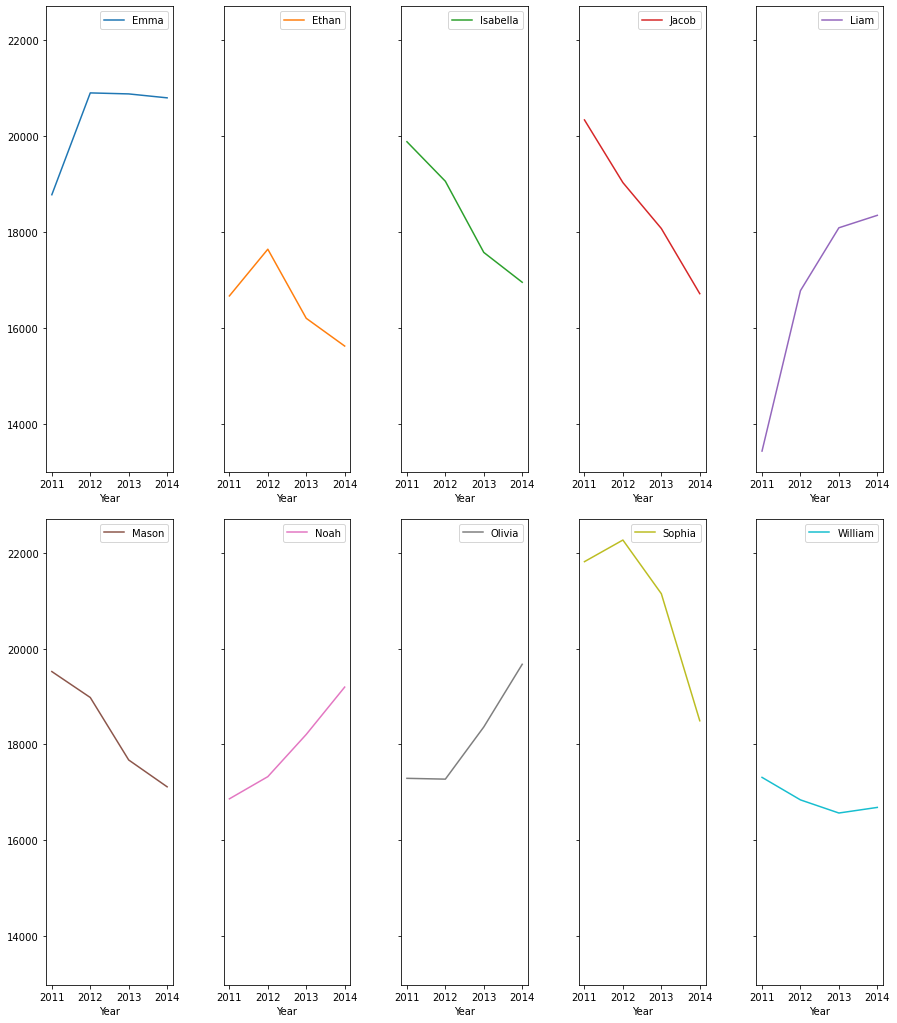

In [79]:
fig, axes= plt.subplots(2,5,figsize=(15,18),gridspec_kw={'wspace':0.4,'hspace':0.1},sharey=True)

top10_2010_data_grouped_unstack2.plot(ax=axes,subplots=True)
#axes.set_xticklabels(top10_2010_data_grouped_unstack2.Year)

# fig, a = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
# df.plot(ax=a, subplots=True, rot=60);

## Which name was the most popular in each state?

**Answer**:<br>
The table below shows the most popular name in each state.


In [80]:
baby_names.head()
bn_grouped=baby_names.groupby(['State','Name'])['Count'].sum()
bn_grouped_reset=bn_grouped.reset_index()
bn_grouped_reset
bn_grouped_reset_sorted=bn_grouped_reset.sort_values(by=['State','Count'],ascending=False)
bn_grouped_reset_sorted.drop_duplicates(subset='State')


,State,Name,Count
167197,WY,Emma,370
166228,WV,Jacob,1843
164719,WI,Mason,4290
159745,WA,Emma,4624
158086,VT,Emma,504
157738,VA,William,7175
151587,UT,Ethan,3036
145299,TX,Jose,23934
139623,TN,William,7173
135140,SD,Emma,695


## Pay attention to 4 states: AK, WY, CA and TX. How many girls and how many boys were born in each of those 4 states in each year?

**Answer**:<br>
The table below shows the number of boys and girls born in each of the four states in each year. 

In [81]:

state_vector=['AK','CA','WY','TX']
state_vector
four_states=baby_names[baby_names.State.isin(state_vector)]
four_states_gender_data=four_states.groupby(['State','Year','Gender'])['Count'].sum()
four_states_gender_data.unstack().style.format('{:,}')


## It appears that the fraction of girls is different in CA & TX than in AK & WY. How is it different? What is the simplest hypothesis for this observation based on the dataset?

**Answer**:<br>
**How is the fraction different?** <br>

In this dataset, the percentage of girls born in AK and WY is between 6-8% lower than the percentage of girls born in CA and TX. Specifically, the percentage of girls born in CA & TX is approximately 47%, whereas it is approximately 41% and 39% in AK and WY, respectively.<br>

Please see the tables below showing the exact percentages overall and per year.<br>

**What is the simplest hypothesis for this observation based on the dataset?**
A number of factors could potentially account for this observation of different fractions of girl babies born. Certainly, the smaller sample size in AK and WY could contribute to percentages that are 1) lower than CA and TX, and 2) are further away from approximately 50% (the percentage we would expect in a large sample size if gender is truly random)  <br>

Additionally, specifically in this dataset, names are only included if the count for the name is five or more for a given name in a given year for each state. So it seems plausible that there are more female babies that were born in AK and WY but they are unrepresented in this dataset due to the fact that they had names that belonged to 4 or fewer babies born in that state in a given year. 

It appears that the overall birth rate in Wyoming for example ( https://health.wyo.gov/wp-content/uploads/2020/11/WYNAT19_2005_2019ByOccCounty.pdf) is higher than the totals reported here in this dataset. This is consistent with the hypothesis above regarding total births being underrepresented in this data set due to the requirement for a minimum of 5 babies born per state per year with a given name.

Additionally, these patterns could be related to reporting issues, potentially due to the lower population and potentially lower availability of resources in states like WY and AK, but these potential contributors are not specifically related to the nature of this dataset. 

In [82]:
state_vector=['AK','CA','WY','TX']
state_vector
four_states=baby_names[baby_names.State.isin(state_vector)]
four_states

four_states_gender_data=four_states.groupby(['State','Gender'])['Count'].sum()
four_states_gender_data.unstack().style.format('{:,}')
four_states_gender_data3=four_states_gender_data.unstack()
four_states_gender_data3['Total']=four_states_gender_data3['F']+four_states_gender_data3['M']
four_states_gender_data3['Percent Female']=100* four_states_gender_data3['F']/four_states_gender_data3['Total']

mapper= {'F': '{:,}',
        'M': '{:,}',
        'Total': '{:,}',
        'Percent Female':'{:.2f}'}
    
four_states_gender_data4=four_states_gender_data3.style.format(mapper)    
four_states_gender_data4


Gender,F,M,Total,Percent Female
State,,,,
AK,"26,250","37,399","63,649",41.24
CA,"2,414,063","2,670,584","5,084,647",47.48
TX,"1,786,281","2,005,394","3,791,675",47.11
WY,"14,107","21,912","36,019",39.17


In [83]:
#view data without and with style formatting for comparison
four_states_gender_data=four_states.groupby(['State','Year','Gender'])['Count'].sum()
four_states_gender_data2=four_states_gender_data.unstack()
four_states_gender_data2['Total']=four_states_gender_data2['F']+four_states_gender_data2['M']
four_states_gender_data2['Percent Female']=100* four_states_gender_data2['F']/four_states_gender_data2['Total']

#format for easier visualization
mapper= {'F': '{:,}',
        'M': '{:,}',
        'Total': '{:,}',
        'Percent Female':'{:.2f}'}
    
four_states_gender_data2=four_states_gender_data2.style.format(mapper)    
four_states_gender_data2


## Emily was born in 2010. Estimate the probability she was born in WA state?

**Answer**:<br>
    The probability that Emily was born in WA state is approximately 2.25% (or 2.25/100- i.e. 0.0225). 
    
   <br> 
    This can be estimated empirically as shown in the subsequent analysis by calculating the total number of babies named Emily born in WA in 2010 as compared to the total number of babies born in the US in 2010.

# Analysis

## EDA of baby_names

In [84]:
#check the data types of each column in the dataset
baby_names.dtypes

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object

In [85]:
#examine the dataset initially at max counts per subgroup
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [86]:
#examine the dataset initially at min counts per subgroup
baby_names.tail()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5
1016394,5647425,5647426,Waylon,2014,M,WY,5


In [87]:
#check the size of the dataset-ie dimensions in terms of number of rows/columns
baby_names.shape

(1016395, 7)

## How many different names in the database? 

## Analysis

In [88]:
#list the unique baby names
baby_names.Name.unique()

array(['Emma', 'Madison', 'Hannah', ..., 'Braun', 'Evrett', 'Coalton'],
      dtype=object)

In [89]:
#check the length of the vector of unique baby names
len(baby_names.Name.unique())

17632

the cell above should give us the total number of different baby names

## How many boys and how many girls were born overall? 

# Analysis

**Answer**: <br> There were approximately 19 million boys (19,041,199 boys) and 16.4 million girls (16,380,293 girls) born overall between 2004 and 2014. 

In [90]:
#confirm that Male and Female are the only two gender options included in the dataset. no NaN or unreported etc.
baby_names.Gender.unique()

array(['F', 'M'], dtype=object)

In [91]:
#confirm there are no null values for gender in the dataset
baby_names.Gender.isnull().sum()

0

all entries are either male or female. are there any NA values?-no 

In [92]:
boys=baby_names[baby_names.Gender=="M"]
print(len(boys))

457549


The code above tells us the number of entry lines in the dataset that have Male as the gender. and in the cell below are the ones that have Female as gender. should sum to the total number of rows in the dataset

In [93]:
#confirming the number of rows with girl baby names (note this is the number of subgroups, 
#not the total number of girl babies, see more below)
girls=baby_names[baby_names.Gender=="F"]
print(len(girls))

558846


In [94]:
len(girls)+len(boys)

1016395

In [95]:
baby_names.shape[0]

1016395

In [96]:
#So this confirm the numbers of rows in the dataset broken down by boy and girl
(len(girls)+len(boys))==baby_names.shape[0]

True

so now we need to sum the counts for each row for all of the girl rows and all of the boy rows


In [97]:
baby_names.Count.isnull().sum()

0

so the cell above suggests that there are no rows without counts reported included in the dataset..

In [98]:
girls.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [99]:
#sum together the counts for all of the "girl" rows to get the total number of girls born
tot_girls=girls.Count.sum()
tot_girls

16380293

In [100]:
#sum together the counts for all of the "boy" rows to get the total number of boys born
tot_boys=boys.Count.sum()
tot_boys

19041199

In [101]:
#confirm total number of babies born in the dataset
baby_names.Count.sum()

35421492

In [102]:
#confirm that the subgroup boy/girl analysis adds up to the total number of babies born in the dataset
tot_girls+tot_boys

35421492

In [103]:
#check the rough average number of babies born per year by dividing 
#the total by the approximately 10 (11) years included in the dataset
avg_births_per_year=baby_names.Count.sum()/10
avg_births_per_year

3542149.2

**Additional Comments**:

The total number of births is approximately consistent with listings from the CDC of about 3.6M babies born per year (https://www.cdc.gov/nchs/fastats/births.htm) 

Interesting to see that the birth rate skews towards more males than females for biological reasons (in addition to social/cultural): https://ourworldindata.org/sex-ratio-at-birth. 


In [104]:
#rough rate of boy:girl births in this dataset
19/16.4

1.1585365853658538

In [105]:
#rough rate of male:female births llisted in the article above
105/100 

1.05

1.05 is average male/female births stated in article above as compared to approximately 1.15 in the dataset here. 

## What are the 10 most popular names in California in 2010?

# Analysis:

**Approach** <br> 
Filter dataframe for only California births in only the year 2010.

In [106]:
cal_2010_births=baby_names[(baby_names['State']=="CA") & (baby_names['Year']==2010)]
print(cal_2010_births.shape)
print(cal_2010_births.head(n=12))

(7004, 7)
       Unnamed: 0      Id      Name  Year Gender State  Count
87307      545370  545371  Isabella  2010      F    CA   3364
87308      545371  545372    Sophia  2010      F    CA   3357
87309      545372  545373     Emily  2010      F    CA   2390
87310      545373  545374       Mia  2010      F    CA   2012
87311      545374  545375      Emma  2010      F    CA   1783
87312      545375  545376  Samantha  2010      F    CA   1672
87313      545376  545377    Olivia  2010      F    CA   1636
87314      545377  545378   Abigail  2010      F    CA   1620
87315      545378  545379   Natalie  2010      F    CA   1475
87316      545379  545380       Ava  2010      F    CA   1408
87317      545380  545381     Sofia  2010      F    CA   1400
87318      545381  545382     Chloe  2010      F    CA   1370


**Validation**: verify that this subset of the dataframe contains the content of interest: births in california (both male and female) from 2010.

In [107]:
for column in cal_2010_births:
    print(cal_2010_births[column].unique())

[545370 545371 545372 ... 698628 698629 698630]
[545371 545372 545373 ... 698629 698630 698631]
['Isabella' 'Sophia' 'Emily' ... 'Zavian' 'Zayn' 'Zekiel']
[2010]
['F' 'M']
['CA']
[3364 3357 2390 2012 1783 1672 1636 1620 1475 1408 1400 1370 1313 1220
 1129 1071 1067 1056 1039 1004  992  979  976  910  906  903  901  899
  881  872  867  863  854  853  814  810  793  791  775  764  719  710
  699  696  681  674  657  651  646  633  627  620  608  607  605  600
  598  587  584  583  580  577  563  559  555  551  547  546  540  537
  533  524  522  515  514  503  502  496  495  488  485  483  482  478
  477  475  473  469  457  448  446  440  438  427  423  414  411  409
  398  393  392  388  387  386  376  375  371  357  354  344  338  336
  333  331  330  328  325  322  319  316  315  310  308  304  302  299
  291  290  286  285  281  279  278  277  275  274  272  269  268  267
  261  260  257  256  255  254  253  252  251  249  247  246  245  243
  240  237  234  230  229  226  223  221

**sort the dataframe subset to confirm the 10 most popular names in California in 2010**

In [108]:
sorted_cal_2010_births=cal_2010_births.sort_values(by=['Count'], ascending= False)
sorted_cal_2010_births

,Unnamed: 0,Id,Name,Year,Gender,State,Count
87307,545370,545371,Isabella,2010,F,CA,3364
87308,545371,545372,Sophia,2010,F,CA,3357
124544,695721,695722,Jacob,2010,M,CA,3347
124545,695722,695723,Daniel,2010,M,CA,3131
124546,695723,695724,Anthony,2010,M,CA,2858
...,...,...,...,...,...,...,...
91015,549078,549079,Guinevere,2010,F,CA,5
91014,549077,549078,Grissel,2010,F,CA,5
91013,549076,549077,Gretta,2010,F,CA,5
91012,549075,549076,Greer,2010,F,CA,5


In [109]:
most_pop_CA_2010_names=print(sorted_cal_2010_births.Name.head(n=10))

87307      Isabella
87308        Sophia
124544        Jacob
124545       Daniel
124546      Anthony
124547    Alexander
124548        Angel
124549        Ethan
124550       Jayden
124551        David
Name: Name, dtype: object


In [110]:
names_2010_array=sorted_cal_2010_births[["Name"]][0:10].values
names_2010_array

array([['Isabella'],
       ['Sophia'],
       ['Jacob'],
       ['Daniel'],
       ['Anthony'],
       ['Alexander'],
       ['Angel'],
       ['Ethan'],
       ['Jayden'],
       ['David']], dtype=object)

## What are the 10 most popular names for children born after 2010 in US?

## For each of the 10 most popular names, show (in a visualization / chart) how many children were born in each year

## Analysis: (for both questions above)

In [111]:
#select all rows with babies born after 2010
after_2010= baby_names[baby_names.Year>2010]
print(after_2010.shape)
print(after_2010.head(n=10))

(372460, 7)
      Unnamed: 0     Id      Name  Year Gender State  Count
1497       12846  12847    Olivia  2011      F    AK     60
1498       12847  12848      Emma  2011      F    AK     56
1499       12848  12849  Isabella  2011      F    AK     50
1500       12849  12850   Madison  2011      F    AK     46
1501       12850  12851    Sophia  2011      F    AK     44
1502       12851  12852       Ava  2011      F    AK     43
1503       12852  12853     Emily  2011      F    AK     40
1504       12853  12854     Chloe  2011      F    AK     39
1505       12854  12855   Abigail  2011      F    AK     32
1506       12855  12856    Amelia  2011      F    AK     30


In [112]:
#sort rows by Count to look at most popular names in individual years
after_2010_sorted=after_2010.sort_values(by=['Count'], ascending=False)
after_2010_sorted.head(n=10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
95393,553456,553457,Sophia,2012,F,CA,3634
91401,549464,549465,Sophia,2011,F,CA,3562
99481,557544,557545,Sophia,2013,F,CA,3451
127454,698631,698632,Jacob,2011,M,CA,3165
103432,561495,561496,Sophia,2014,F,CA,3162
95394,553457,553458,Isabella,2012,F,CA,3106
91402,549465,549466,Isabella,2011,F,CA,3055
130339,701516,701517,Jacob,2012,M,CA,2971
127455,698632,698633,Daniel,2011,M,CA,2902
133243,704420,704421,Jacob,2013,M,CA,2879


In [113]:
#quick check to confirm the details of the subgroup analysis as compared to the total dataset
for col in baby_names:
    print(baby_names[col].unique())

[  11349   11350   11351 ... 5647423 5647424 5647425]
[  11350   11351   11352 ... 5647424 5647425 5647426]
['Emma' 'Madison' 'Hannah' ... 'Braun' 'Evrett' 'Coalton']
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
['F' 'M']
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
[  62   48   46 ... 1540 1231 1087]


In [114]:
#quick check to confirm the details of the subgroup analysis as compared to the total dataset
for col in after_2010_sorted:
    print(after_2010_sorted[col].unique())

[ 553456  549464  557544 ...  764591  764590 5647425]
[ 553457  549465  557545 ...  764592  764591 5647426]
['Sophia' 'Jacob' 'Isabella' ... 'Zaydee' 'Bergen' 'Eliyohu']
[2012 2011 2013 2014]
['F' 'M']
['CA' 'TX' 'FL' 'NY' 'IL' 'PA' 'OH' 'GA' 'NC' 'NJ' 'MI' 'VA' 'TN' 'AZ'
 'MA' 'WI' 'IN' 'MO' 'WA' 'MN' 'AL' 'MD' 'SC' 'KY' 'CO' 'LA' 'UT' 'MS'
 'OK' 'OR' 'CT' 'IA' 'KS' 'NV' 'AR' 'WV' 'NM' 'NE' 'ID' 'NH' 'RI' 'ME'
 'HI' 'DC' 'ND' 'MT' 'SD' 'DE' 'AK' 'VT' 'WY']
[3634 3562 3451 ...    7    6    5]


In [115]:
#summing the counts per year/state for individual names to find the most popular names combined across subgroups
Names_combined=after_2010_sorted.groupby(['Name'])['Count'].sum()
Names_combined_sorted=Names_combined.sort_values(ascending=False)
Names_combined_sorted.head(n=10)

Name
Sophia      83725
Emma        81359
Jacob       74152
Isabella    73464
Mason       73297
Olivia      72611
Noah        71603
William     67415
Liam        66636
Ethan       66122
Name: Count, dtype: int64

In [116]:
Names_combined2=after_2010.groupby(['Name'])['Count'].sum()
Names_combined2=Names_combined.sort_values(ascending=False)
Names_combined2.head(n=10)

Name
Sophia      83725
Emma        81359
Jacob       74152
Isabella    73464
Mason       73297
Olivia      72611
Noah        71603
William     67415
Liam        66636
Ethan       66122
Name: Count, dtype: int64

In [117]:
#reindex the list of names for ease of use
Names_combo_re_index=Names_combined_sorted.reset_index()
Names_combo_re_index

,Name,Count
0,Sophia,83725
1,Emma,81359
2,Jacob,74152
3,Isabella,73464
4,Mason,73297
...,...,...
13321,Michoel,5
13322,Juli,5
13323,Mairim,5
13324,Rhylin,5


In [118]:
#make an object with the top 10 names for ease of analysis
name_vec_after_2010=Names_combo_re_index['Name'][0:10]
name_vec_after_2010

0      Sophia
1        Emma
2       Jacob
3    Isabella
4       Mason
5      Olivia
6        Noah
7     William
8        Liam
9       Ethan
Name: Name, dtype: object

In [119]:
#exploring briefly names within individual years
after_2010_unique=after_2010_sorted.drop_duplicates('Name')
after_2010_unique.head(n=10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
95393,553456,553457,Sophia,2012,F,CA,3634
127454,698631,698632,Jacob,2011,M,CA,3165
95394,553457,553458,Isabella,2012,F,CA,3106
127455,698632,698633,Daniel,2011,M,CA,2902
130340,701517,701518,Jayden,2012,M,CA,2864
136134,707311,707312,Noah,2014,M,CA,2761
127457,698634,698635,Anthony,2011,M,CA,2687
130342,701519,701520,Ethan,2012,M,CA,2670
103434,561497,561498,Emma,2014,F,CA,2662
130343,701520,701521,Matthew,2012,M,CA,2646


In [120]:
#pull the dataset for just the 10 most popular names after 2010
top10_2010_data=after_2010[after_2010.Name.isin(name_vec_after_2010)]
top10_2010_data

,Unnamed: 0,Id,Name,Year,Gender,State,Count
1497,12846,12847,Olivia,2011,F,AK,60
1498,12847,12848,Emma,2011,F,AK,56
1499,12848,12849,Isabella,2011,F,AK,50
1501,12850,12851,Sophia,2011,F,AK,44
1732,13081,13082,Emma,2012,F,AK,57
...,...,...,...,...,...,...,...
1016216,5647247,5647248,William,2014,M,WY,30
1016218,5647249,5647250,Liam,2014,M,WY,29
1016237,5647268,5647269,Noah,2014,M,WY,19
1016239,5647270,5647271,Ethan,2014,M,WY,18


In [121]:
#re-confirming data types here for ease of viewing
top10_2010_data=after_2010[after_2010.Name.isin(name_vec_after_2010)]
top10_2010_data_str=top10_2010_data
top10_2010_data_str
top10_2010_data_str.dtypes

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object

In [122]:
#for the top 10 names group by year and combine across states to answers the question
top10_2010_data_grouped=top10_2010_data.groupby(['Name','Year'])['Count'].sum()
print(top10_2010_data_grouped.shape)
top10_2010_data_grouped

(40,)


Name      Year
Emma      2011    18777
          2012    20902
          2013    20881
          2014    20799
Ethan     2011    16665
          2012    17640
          2013    16198
          2014    15619
Isabella  2011    19883
          2012    19058
          2013    17573
          2014    16950
Jacob     2011    20338
          2012    19030
          2013    18072
          2014    16712
Liam      2011    13427
          2012    16775
          2013    18087
          2014    18347
Mason     2011    19522
          2012    18981
          2013    17677
          2014    17117
Noah      2011    16866
          2012    17329
          2013    18210
          2014    19198
Olivia    2011    17294
          2012    17277
          2013    18366
          2014    19674
Sophia    2011    21816
          2012    22267
          2013    21147
          2014    18495
William   2011    17314
          2012    16844
          2013    16570
          2014    16687
Name: Count, dtype: int64

In [123]:
top10_2010_data_grouped_flip=top10_2010_data.groupby(['Year','Name'])['Count'].sum()
print(top10_2010_data_grouped_flip.shape)
top10_2010_data_grouped_flip

(40,)


Year  Name    
2011  Emma        18777
      Ethan       16665
      Isabella    19883
      Jacob       20338
      Liam        13427
      Mason       19522
      Noah        16866
      Olivia      17294
      Sophia      21816
      William     17314
2012  Emma        20902
      Ethan       17640
      Isabella    19058
      Jacob       19030
      Liam        16775
      Mason       18981
      Noah        17329
      Olivia      17277
      Sophia      22267
      William     16844
2013  Emma        20881
      Ethan       16198
      Isabella    17573
      Jacob       18072
      Liam        18087
      Mason       17677
      Noah        18210
      Olivia      18366
      Sophia      21147
      William     16570
2014  Emma        20799
      Ethan       15619
      Isabella    16950
      Jacob       16712
      Liam        18347
      Mason       17117
      Noah        19198
      Olivia      19674
      Sophia      18495
      William     16687
Name: Count, dtype: int64

In [124]:
top10_2010_data_grouped.reset_index()

,Name,Year,Count
0,Emma,2011,18777
1,Emma,2012,20902
2,Emma,2013,20881
3,Emma,2014,20799
4,Ethan,2011,16665
5,Ethan,2012,17640
6,Ethan,2013,16198
7,Ethan,2014,15619
8,Isabella,2011,19883
9,Isabella,2012,19058


In [125]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_flip_reset=top10_2010_data_grouped_flip.reset_index()
top10_2010_data_grouped_flip_reset

,Year,Name,Count
0,2011,Emma,18777
1,2011,Ethan,16665
2,2011,Isabella,19883
3,2011,Jacob,20338
4,2011,Liam,13427
5,2011,Mason,19522
6,2011,Noah,16866
7,2011,Olivia,17294
8,2011,Sophia,21816
9,2011,William,17314


In [126]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_flip.Year1=str(top10_2010_data_grouped_flip_reset.Year)
top10_2010_data_grouped_flip

Year  Name    
2011  Emma        18777
      Ethan       16665
      Isabella    19883
      Jacob       20338
      Liam        13427
      Mason       19522
      Noah        16866
      Olivia      17294
      Sophia      21816
      William     17314
2012  Emma        20902
      Ethan       17640
      Isabella    19058
      Jacob       19030
      Liam        16775
      Mason       18981
      Noah        17329
      Olivia      17277
      Sophia      22267
      William     16844
2013  Emma        20881
      Ethan       16198
      Isabella    17573
      Jacob       18072
      Liam        18087
      Mason       17677
      Noah        18210
      Olivia      18366
      Sophia      21147
      William     16570
2014  Emma        20799
      Ethan       15619
      Isabella    16950
      Jacob       16712
      Liam        18347
      Mason       17117
      Noah        19198
      Olivia      19674
      Sophia      18495
      William     16687
Name: Count, dtype: int64

In [127]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_unstack=top10_2010_data_grouped.unstack()
top10_2010_data_grouped_unstack


Year,2011,2012,2013,2014
Name,,,,
Emma,18777,20902,20881,20799
Ethan,16665,17640,16198,15619
Isabella,19883,19058,17573,16950
Jacob,20338,19030,18072,16712
Liam,13427,16775,18087,18347
Mason,19522,18981,17677,17117
Noah,16866,17329,18210,19198
Olivia,17294,17277,18366,19674
Sophia,21816,22267,21147,18495


In [128]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_unstack2=top10_2010_data_grouped_flip.unstack()
top10_2010_data_grouped_unstack2


Name,Emma,Ethan,Isabella,Jacob,Liam,Mason,Noah,Olivia,Sophia,William
Year,,,,,,,,,,
2011,18777,16665,19883,20338,13427,19522,16866,17294,21816,17314
2012,20902,17640,19058,19030,16775,18981,17329,17277,22267,16844
2013,20881,16198,17573,18072,18087,17677,18210,18366,21147,16570
2014,20799,15619,16950,16712,18347,17117,19198,19674,18495,16687


In [129]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_unstack_flip=top10_2010_data_grouped_flip.unstack()
top10_2010_data_grouped_unstack_flip

Name,Emma,Ethan,Isabella,Jacob,Liam,Mason,Noah,Olivia,Sophia,William
Year,,,,,,,,,,
2011,18777,16665,19883,20338,13427,19522,16866,17294,21816,17314
2012,20902,17640,19058,19030,16775,18981,17329,17277,22267,16844
2013,20881,16198,17573,18072,18087,17677,18210,18366,21147,16570
2014,20799,15619,16950,16712,18347,17117,19198,19674,18495,16687


In [130]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_unstack_flip.shape

(4, 10)

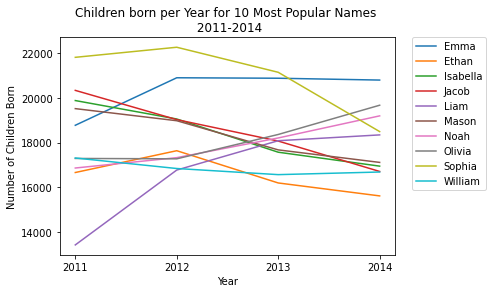

In [131]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph
top10_2010_data_grouped_unstack2.plot()
plt.xticks(range(2011,2015))
plt.title('Children born per Year for 10 Most Popular Names \n 2011-2014')
plt.ylabel('Number of Children Born')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

(40,)
(40,)


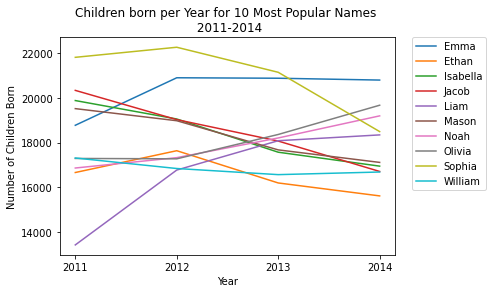

In [132]:
#exploring ways to visualize the output as a table and prepare for visualization as a graph: combined for answer
after_2010= baby_names[baby_names.Year>2010]
top10_2010_data_grouped=top10_2010_data.groupby(['Name','Year'])['Count'].sum()
print(top10_2010_data_grouped.shape)
top10_2010_data_grouped
top10_2010_data_grouped=top10_2010_data.groupby(['Name','Year'])['Count'].sum()
print(top10_2010_data_grouped.shape)
top10_2010_data_grouped
top10_2010_data_grouped_unstack=top10_2010_data_grouped.unstack()
top10_2010_data_grouped_unstack
top10_2010_data_grouped_unstack2=top10_2010_data_grouped_flip.unstack()
top10_2010_data_grouped_unstack2
top10_2010_data_grouped_unstack2.plot()
plt.xticks(range(2011,2015))
plt.title('Children born per Year for 10 Most Popular Names \n 2011-2014')
plt.ylabel('Number of Children Born')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

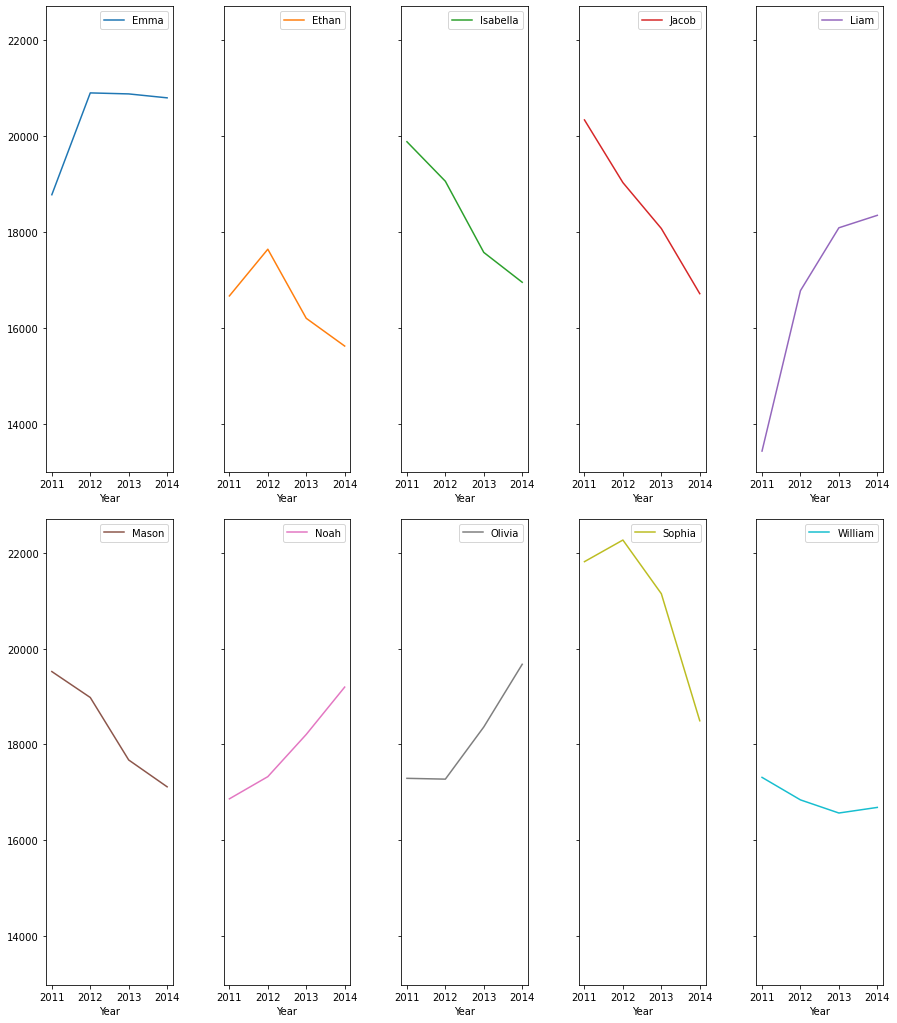

In [133]:
#visualization as individual plots 
fig, axes= plt.subplots(2,5,figsize=(15,18),gridspec_kw={'wspace':0.4,'hspace':0.1},sharey=True)

top10_2010_data_grouped_unstack2.plot(ax=axes,subplots=True)


In [134]:
#confirming the details of the subset for after 2010
for col in top10_2010_data:
    print(top10_2010_data[col].unique())

[  12846   12847   12848 ... 5647268 5647270 5647293]
[  12847   12848   12849 ... 5647269 5647271 5647294]
['Olivia' 'Emma' 'Isabella' 'Sophia' 'Mason' 'William' 'Liam' 'Ethan'
 'Jacob' 'Noah']
[2011 2012 2013 2014]
['F' 'M']
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
[  60   56   50   44   57   49   30   38   35   47   43   33   58   52
   48   45   32   42   41   63   46   65   39   36  282  229  223  149
  320  228  198  164  329  213  181  180    5  286  265  190  148  445
  300  281  257  215  113  437  302  261  220  212  143  292  235  173
  165  427  250  205  189  185  154  130  117  186  163  136  133  214
  156  129  127  158  126  118  216  187  182  159  139   91  217  157
  153  146  109  195  131  123  120  176  174  161  135  119  114  558
  508  370  299 

## Which name was the most popular in each state?

## Analysis

In [135]:
#find the subgroups by state for the counts for each name 
#and then keep only the entry with the most popular name for each state
baby_names.head()
bn_grouped=baby_names.groupby(['State','Name'])['Count'].sum()
bn_grouped_reset=bn_grouped.reset_index()
bn_grouped_reset
bn_grouped_reset_sorted=bn_grouped_reset.sort_values(by=['State','Count'],ascending=False)
bn_grouped_reset_sorted.drop_duplicates(subset='State')


,State,Name,Count
167197,WY,Emma,370
166228,WV,Jacob,1843
164719,WI,Mason,4290
159745,WA,Emma,4624
158086,VT,Emma,504
157738,VA,William,7175
151587,UT,Ethan,3036
145299,TX,Jose,23934
139623,TN,William,7173
135140,SD,Emma,695


In [136]:
#looking at the data before dropping to just include the most popular name per state 
baby_names.head()
bn_grouped=baby_names.groupby(['State','Name'])['Count'].sum()
bn_grouped_reset=bn_grouped.reset_index()
bn_grouped_reset
bn_grouped_reset_sorted=bn_grouped_reset.sort_values(by=['State','Count'],ascending=False)
bn_grouped_reset_sorted

,State,Name,Count
167197,WY,Emma,370
167618,WY,Wyatt,339
167428,WY,Madison,324
167268,WY,Jacob,322
167616,WY,William,321
...,...,...,...
877,AK,Urijah,5
878,AK,Valentina,5
886,AK,Virginia,5
889,AK,Wade,5


## Pay attention to 4 states: AK, WY, CA and TX. How many girls and how many boys were born in each of those 4 states in each year?

In [137]:
#subset the data to restrict to the four states of interest and 
#group data to see number of girls and boys per state total
state_vector=['AK','CA','WY','TX']
state_vector
four_states=baby_names[baby_names.State.isin(state_vector)]
four_states
grouped_data_four_state=four_states.groupby(['State','Gender'])['Count'].sum()
grouped_data_four_state

State  Gender
AK     F           26250
       M           37399
CA     F         2414063
       M         2670584
TX     F         1786281
       M         2005394
WY     F           14107
       M           21912
Name: Count, dtype: int64

In [138]:
four_states.groupby(['State','Gender'])['Count'].sum()

State  Gender
AK     F           26250
       M           37399
CA     F         2414063
       M         2670584
TX     F         1786281
       M         2005394
WY     F           14107
       M           21912
Name: Count, dtype: int64

In [139]:
#format viewing style for better visualization and sharing
four_states_gender_data=four_states.groupby(['State','Gender'])['Count'].sum()
four_states_gender_data.unstack().style.format('{:,}')


Gender,F,M
State,,
AK,"26,250","37,399"
CA,"2,414,063","2,670,584"
TX,"1,786,281","2,005,394"
WY,"14,107","21,912"


In [140]:
#include the grouping by year with formatting for ease of viewing
state_vector=['AK','CA','WY','TX']
state_vector
four_states=baby_names[baby_names.State.isin(state_vector)]
four_states_gender_data=four_states.groupby(['State','Year','Gender'])['Count'].sum()
four_states_gender_data.unstack().style.format('{:,}')


In [141]:
#view data without style formatting for comparison
four_states_gender_data=four_states.groupby(['State','Year','Gender'])['Count'].sum()
four_states_gender_data.unstack()

Gender           F       M
State Year                
AK    2004    2317    3271
      2005    2295    3319
      2006    2382    3337
      2007    2333    3446
      2008    2425    3506
      2009    2333    3463
      2010    2407    3425
      2011    2515    3397
      2012    2290    3341
      2013    2426    3466
      2014    2527    3428
CA    2004  228629  251964
      2005  230207  253941
      2006  234532  260073
      2007  235978  261217
      2008  229053  253810
      2009  217958  241789
      2010  210587  233343
      2011  207102  229755
      2012  208355  229714
      2013  204089  225999
      2014  207573  228979
TX    2004  159167  179012
      2005  160442  180922
      2006  165969  186152
      2007  168940  190108
      2008  167455  188896
      2009  166358  186112
      2010  159273  178271
      2011  155424  174574
      2012  157713  176992
      2013  160159  179358
      2014  165381  184997
WY    2004    1267    1815
      2005    1318    2060
      2006    1327    2185
      2007    1492    2118
      2008    1414    2120
      2009    1298    2059
      2010    1265    1897
      2011    1142    1847
      2012    1145    1906
      2013    1233    1960
      2014    1206    1945

## It appears that the fraction of girls is different in CA & TX than in AK & WY. How is it different? What is the simplest hypothesis for this observation based on the dataset?

In [142]:
#view data without and with style formatting for comparison
four_states_gender_data=four_states.groupby(['State','Year','Gender'])['Count'].sum()
four_states_gender_data2=four_states_gender_data.unstack()
four_states_gender_data2['Total']=four_states_gender_data2['F']+four_states_gender_data2['M']
four_states_gender_data2['Percent Female']=100* four_states_gender_data2['F']/four_states_gender_data2['Total']

#format for easier visualization
mapper= {'F': '{:,}',
        'M': '{:,}',
        'Total': '{:,}',
        'Percent Female':'{:.2f}'}
    
four_states_gender_data2=four_states_gender_data2.style.format(mapper)    
four_states_gender_data2


In [143]:
#estimate percentages of female babies total per state

four_states_gender_data=four_states.groupby(['State','Gender'])['Count'].sum()
four_states_gender_data.unstack().style.format('{:,}')
four_states_gender_data3=four_states_gender_data.unstack()
four_states_gender_data3['Total']=four_states_gender_data3['F']+four_states_gender_data3['M']
four_states_gender_data3['Percent Female']=100* four_states_gender_data3['F']/four_states_gender_data3['Total']

#format for easier visualization
mapper= {'F': '{:,}',
        'M': '{:,}',
        'Total': '{:,}',
        'Percent Female':'{:.2f}'}
    
four_states_gender_data4=four_states_gender_data3.style.format(mapper)    
four_states_gender_data4


Gender,F,M,Total,Percent Female
State,,,,
AK,"26,250","37,399","63,649",41.24
CA,"2,414,063","2,670,584","5,084,647",47.48
TX,"1,786,281","2,005,394","3,791,675",47.11
WY,"14,107","21,912","36,019",39.17


In [144]:
#check how many female babies would need to have been included in the dataset 
#to have a comparable percentage born in AK as compared to CA/TX
print(0.47*63649)
print(0.47*70000)
print(70000-(0.47*70000))

29915.03
32900.0
37100.0


the numbers in the cell are consistent with the idea that underreporting of female births due to lower incidence of individual names could account for the lower percentage of female births reported here. 

In [145]:
#check the difference in total babies that would need to have been born to match the 
#percentage in AK to the percentage in CA/TX

print(29915-26250)
print((29915-26250)/365)
print(32900/365/10)

3665
10.04109589041096
9.013698630136986


looks like Wyoming birth rates are around 6K per year, consistent with underreporting observed here.
https://health.wyo.gov/wp-content/uploads/2020/11/WYNAT19_2005_2019ByOccCounty.pdf

In [146]:
#similar quick comparison for AK
0.47*36019

16928.93

In [147]:
#similar quick comparison for AK
16928-14107

2821

In [148]:
grouped_data_four_state_combo=four_states.groupby(['State'])['Count'].sum()
grouped_data_four_state_combo

State
AK      63649
CA    5084647
TX    3791675
WY      36019
Name: Count, dtype: int64

Statistics (Count) are provided for each name, state, gender and year of birth **if Count >= 5**

In [149]:
four_states

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


In [150]:
four_states.groupby(['State','Year'])['Count'].sum()

State  Year
AK     2004      5588
       2005      5614
       2006      5719
       2007      5779
       2008      5931
       2009      5796
       2010      5832
       2011      5912
       2012      5631
       2013      5892
       2014      5955
CA     2004    480593
       2005    484148
       2006    494605
       2007    497195
       2008    482863
       2009    459747
       2010    443930
       2011    436857
       2012    438069
       2013    430088
       2014    436552
TX     2004    338179
       2005    341364
       2006    352121
       2007    359048
       2008    356351
       2009    352470
       2010    337544
       2011    329998
       2012    334705
       2013    339517
       2014    350378
WY     2004      3082
       2005      3378
       2006      3512
       2007      3610
       2008      3534
       2009      3357
       2010      3162
       2011      2989
       2012      3051
       2013      3193
       2014      3151
Name: Count, dtype: 

## Emily was born in 2010. Estimate the probability she was born in WA state?

In [151]:
#restrict data to Emily and 2010
Emily_data=baby_names[(baby_names.Name=='Emily') & (baby_names.Year==2010)]


print(Emily_data.shape)

print(Emily_data.Count.sum())
#compare counts of Total Emily to counts of Emily in WA
Emily_WA=Emily_data[Emily_data.State=="WA"]
print(Emily_WA)
#estimate probability by WA/total 
print(Emily_WA.Count/Emily_data.Count.sum()*100)
Emily_data

(51, 7)
14260
        Unnamed: 0       Id   Name  Year Gender State  Count
968253     5382546  5382547  Emily  2010      F    WA    321
968253    2.251052
Name: Count, dtype: float64


,Unnamed: 0,Id,Name,Year,Gender,State,Count
1289,12638,12639,Emily,2010,F,AK,25
10379,90631,90632,Emily,2010,F,AL,183
27186,202036,202037,Emily,2010,F,AR,133
45058,303375,303376,Emily,2010,F,AZ,291
87309,545372,545373,Emily,2010,F,CA,2390
145291,760528,760529,Emily,2010,F,CO,209
163298,850056,850057,Emily,2010,F,CT,138
173633,913416,913417,Emily,2010,F,DC,26
179422,955188,955189,Emily,2010,F,DE,40
197121,1065206,1065207,Emily,2010,F,FL,817
